In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

In [2]:
dados = pd.read_csv("/Users/geraldocangondo/Desktop/Data_Analise/Data_Science_Udemy/ML_Classificacao/Bases de dados/credit_data.csv")

In [3]:
dados.head()

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1


1 ) - Analise inicias dos dados.

In [4]:
linhas, colunas = dados.shape
print(f'Total de Linhas:{linhas}')
print(f'Total de Colunas:{colunas}')

Total de Linhas:2000
Total de Colunas:5


In [5]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   clientid  2000 non-null   int64  
 1   income    2000 non-null   float64
 2   age       1997 non-null   float64
 3   loan      2000 non-null   float64
 4   default   2000 non-null   int64  
dtypes: float64(3), int64(2)
memory usage: 78.3 KB


In [42]:
dados.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
clientid,2000.0,1000.500000,577.494589,1.000000,500.750000,1000.500000,1500.250000,2000.000000
income,2000.0,45331.600018,14326.327119,20014.489470,32796.459717,45789.117313,57791.281668,69995.685578
age,2000.0,40.927689,13.251870,18.055189,29.102161,41.300710,52.582340,63.971796
loan,2000.0,4444.369695,3045.410024,1.377630,1939.708847,3974.719419,6432.410625,13766.051239
default,2000.0,0.141500,0.348624,0.000000,0.000000,0.000000,0.000000,1.000000


In [7]:
col = dados['default'].value_counts()
print(f'Total de Clientes que pagam o empréstimo: [1]->{col[0]}')
print(f'Total de Clientes que não pagam o empréstimo: [0]->{col[1]}')

Total de Clientes que pagam o empréstimo: [1]->1717
Total de Clientes que não pagam o empréstimo: [0]->283


2 ) - Visualização gráfica dos dados.

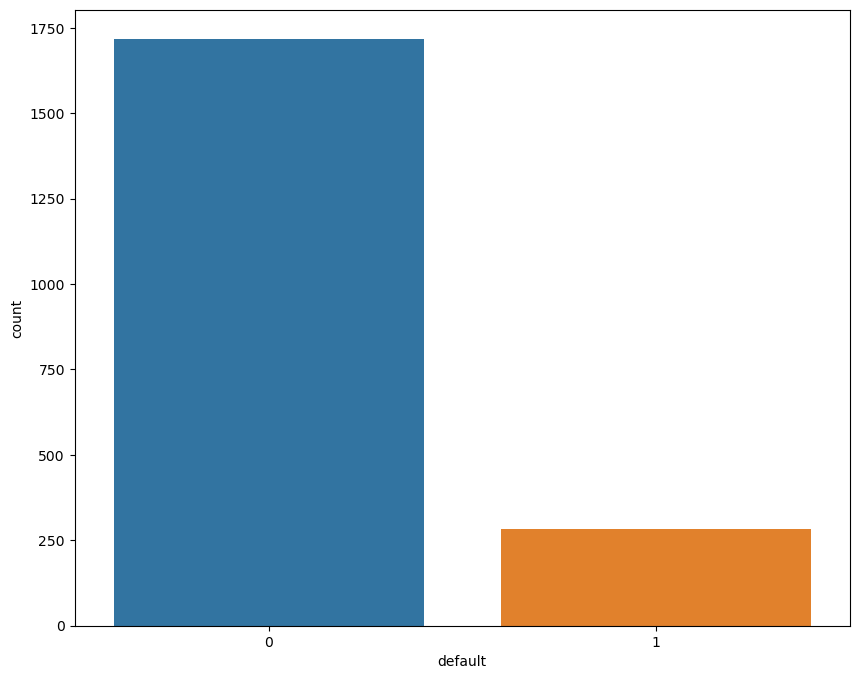

In [8]:
plt.figure(figsize=(10,8))
sns.countplot(x = dados['default']);

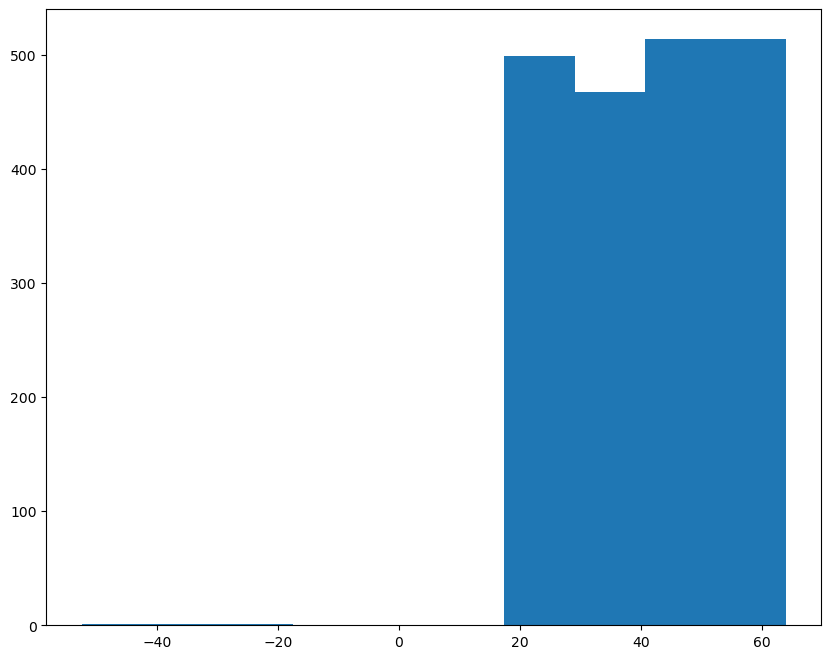

In [9]:
plt.figure(figsize=(10,8))
plt.hist(x = dados['age']);

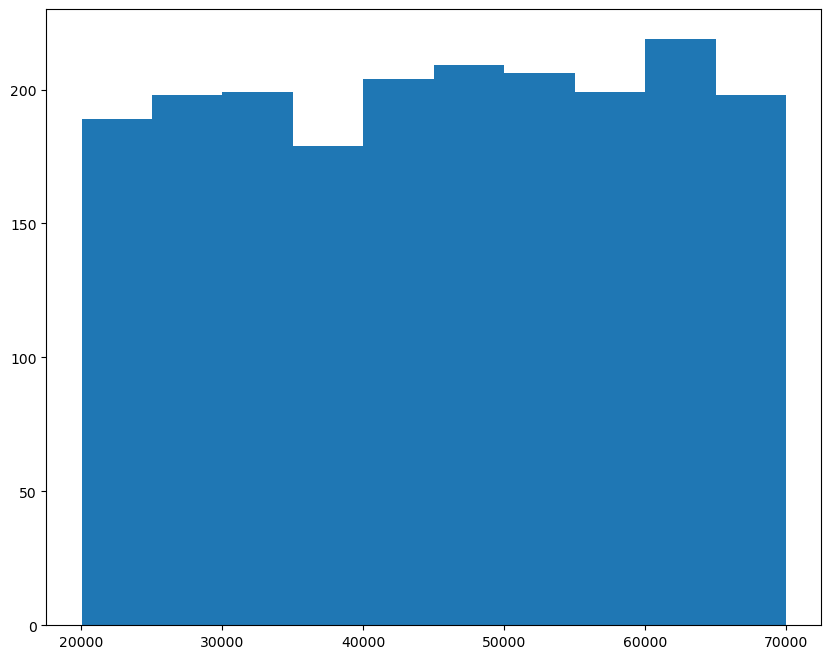

In [10]:
plt.figure(figsize=(10,8))
plt.hist(x = dados['income']);

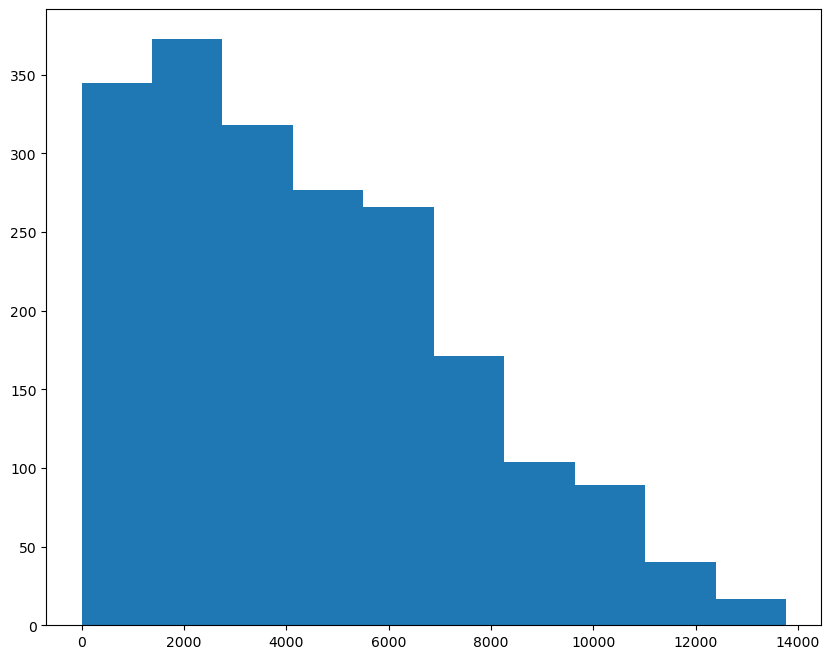

In [11]:
plt.figure(figsize=(10,8))
plt.hist(x = dados['loan']);

In [12]:

grafico_geral = px.scatter_matrix(dados, dimensions=['age','income','loan'], color = 'default', width=1600, height=800)
grafico_geral.show()

3) - Tratamento dos Valores inconsistente para não influenciar o modelo. 

In [13]:
dados.describe()

,clientid,income,age,loan,default
count,2000.000000,2000.000000,1997.000000,2000.000000,2000.000000
mean,1000.500000,45331.600018,40.807559,4444.369695,0.141500
std,577.494589,14326.327119,13.624469,3045.410024,0.348624
min,1.000000,20014.489470,-52.423280,1.377630,0.000000
25%,500.750000,32796.459717,28.990415,1939.708847,0.000000
50%,1000.500000,45789.117313,41.317159,3974.719419,0.000000
75%,1500.250000,57791.281668,52.587040,6432.410625,0.000000
max,2000.000000,69995.685578,63.971796,13766.051239,1.000000


In [14]:
dados[dados['age'] < 0]

,clientid,income,age,loan,default
15,16,50501.726689,-28.218361,3977.287432,0
21,22,32197.620701,-52.423280,4244.057136,0
26,27,63287.038908,-36.496976,9595.286289,0


In [15]:
#Para não considerar as consistências de idades negativas da base de dados

dados['age'][dados['age'] > 0].mean()

40.92770044906149

In [16]:
dados.loc[dados['age'] < 0, 'age'] = 40.92

In [17]:
dados.loc[dados['age'] < 0]

,clientid,income,age,loan,default


In [18]:
dados.head()

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1


In [19]:
#Verificação dos Valores NULL

dados.isnull().sum()

clientid    0
income      0
age         3
loan        0
default     0
dtype: int64

In [20]:
dados.loc[pd.isnull(dados['age'])]

,clientid,income,age,loan,default
28,29,59417.805406,NaN,2082.625938,0
30,31,48528.852796,NaN,6155.784670,0
31,32,23526.302555,NaN,2862.010139,0


In [21]:
dados['age'].fillna(dados['age'].mean(), inplace = True)

/var/folders/r9/cpm0jkw54wbbvlfsv8p2k3h40000gp/T/ipykernel_45555/146134704.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [22]:
dados.loc[pd.isnull(dados['age'])]

,clientid,income,age,loan,default


In [26]:
dados.iloc[[28, 30, 31]]

,clientid,income,age,loan,default
28,29,59417.805406,40.927689,2082.625938,0
30,31,48528.852796,40.927689,6155.784670,0
31,32,23526.302555,40.927689,2862.010139,0


5 ) - Pré-processamento: Divisão dos previsores - varaveis que serão utilizadas no algoritmo 

In [30]:
x_dados = dados[['income','age','loan']].values
y_dados = dados['default'].values

In [31]:
type(dados)

pandas.core.frame.DataFrame

In [33]:
print("Os Atributos para o algoritmo estão no formato de: ", type(x_dados))
print("As Variavel clssificadora está igualmente no formato: ", type(y_dados))

Os Atributos para o algoritmo estão no formato de:  <class 'numpy.ndarray'>
As Variavel clssificadora está igualmente no formato:  <class 'numpy.ndarray'>


In [34]:
x_dados

array([[6.61559251e+04, 5.90170151e+01, 8.10653213e+03],
       [3.44151540e+04, 4.81171531e+01, 6.56474502e+03],
       [5.73171701e+04, 6.31080495e+01, 8.02095330e+03],
       ...,
       [4.43114493e+04, 2.80171669e+01, 5.52278669e+03],
       [4.37560566e+04, 6.39717958e+01, 1.62272260e+03],
       [6.94365796e+04, 5.61526170e+01, 7.37883360e+03]])

In [35]:
y_dados

array([0, 0, 0, ..., 1, 0, 0])

6 ) Escalonamento e Padronização dos valores de x_dados e y_dados

In [37]:
#Por meio da biblioteca (from sklearn.preprocessing import StandardScaler) vamos padronizar os valores
print("Valores minimos dos Atributos são:")
print(x_dados[:,0].min(), x_dados[:,1].min(), x_dados[:,2].min())

Valores minimos dos Atributos são:
20014.4894700497 18.055188510566897 1.37762959325451


In [38]:
print("Valores máximos dos Atributos são:")
print(x_dados[:,0].max(), x_dados[:,1].max(), x_dados[:,2].max())

Valores máximos dos Atributos são:
69995.6855783239 63.971795841120205 13766.0512393337


In [ ]:
#Aplicando a biblioteca
scaler_x_dados = StandardScaler()
x_dados = scaler_x_dados.fit_transform(x_dados)

In [41]:
print("Valores actualizados dos mínimos e máximos referentes aos atributos agora são:")
print(x_dados[:,0].min(), x_dados[:,1].min(), x_dados[:,2].min())
print(x_dados[:,0].max(), x_dados[:,1].max(), x_dados[:,2].max())

Valores actualizados dos mínimos e máximos referentes aos atributos agora são:
-1.7676158019964077 -1.7264145408889917 -1.4592791099462408
1.7220222385319197 1.7393673928651967 3.0616609141708273


7 ) Divisão dos Dados para treinamento e teste

In [ ]:
#importar a base de dados
x_dados_treino, x_dados_teste, y_dados_treino, y_dados_teste = train_test_split(x_dados, y_dados, test_size=0.25, random_state=0) 

In [49]:
print("Dados para o treinamento:")
print(x_dados_treino.shape, y_dados_treino.shape)

Dados para o treinamento:
(1500, 3) (1500,)


In [50]:
print("Dados para o Teste:")
print(x_dados_teste.shape, y_dados.shape)

Dados para o Teste:
(500, 3) (2000,)


8 ) Salvar variaveis no formato Pickle

In [51]:
#importação da biblioteca

with open('credito.pkl', mode = 'wb') as f:
    pickle.dump([x_dados_treino, y_dados_treino, x_dados_teste, y_dados_teste], f)

9 ) Carregamento dos dados do tipo Pickle, Treinmento, Teste e Métrica dos algoritmo

In [52]:
with open('credito.pkl', mode = 'rb') as f:
    x_dados_treino, y_dados_treino, x_dados_teste, y_dados_teste = pickle.load(f)

In [54]:
# Aplicando o Algoritmo Naive Bayes 
# importação da Biblioteca do algoritmo Naive Bayes

naive_dados = GaussianNB()
naive_dados.fit(x_dados_treino, y_dados_treino)

GaussianNB()

In [55]:
previsoes_naive = naive_dados.predict(x_dados_teste)

In [56]:
previsoes_naive

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [57]:
y_dados_teste

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [59]:
accuracy_score(y_dados_teste, previsoes_naive)

0.938

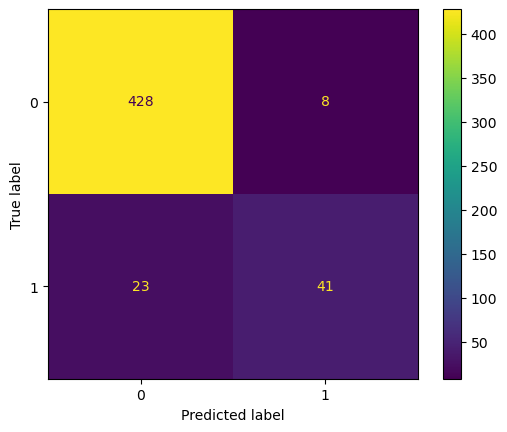

In [66]:
matriz_conf = confusion_matrix(y_dados_teste, previsoes_naive)
visual = ConfusionMatrixDisplay(confusion_matrix=matriz_conf)
visual.plot();

In [68]:
#Relatorio de Classificação

print(classification_report(y_dados_teste, previsoes_naive))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       436
           1       0.84      0.64      0.73        64

    accuracy                           0.94       500
   macro avg       0.89      0.81      0.85       500
weighted avg       0.93      0.94      0.93       500



In [ ]:
# Aplicando o Algoritmo Arvore de Decisão 
# importação da Biblioteca do algoritmo Arvore de Decisão

print("Dados para o treinamento:")
print(x_dados_treino.shape, y_dados_treino.shape)


print("Dados para o Teste:")
print(x_dados_teste.shape, y_dados.shape)

Dados para o treinamento:
(1500, 3) (1500,)
Dados para o Teste:
(500, 3) (2000,)


In [71]:
arvore_dados = DecisionTreeClassifier(criterion='entropy', random_state=0)
arvore_dados.fit(x_dados_treino, y_dados_treino)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [73]:
previsoes_arvore = arvore_dados.predict(x_dados_teste)
previsoes_arvore

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [74]:
y_dados_teste

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [75]:
accuracy_score(y_dados_teste, previsoes_arvore)

0.982

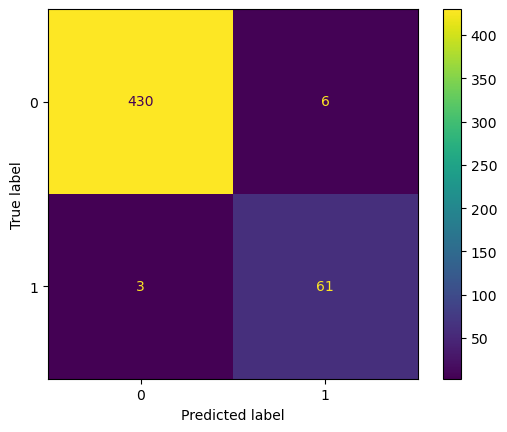

In [76]:
arvore_matriz_conf = confusion_matrix(y_dados_teste, previsoes_arvore)
visual = ConfusionMatrixDisplay(confusion_matrix=arvore_matriz_conf)
visual.plot();

In [77]:
print(classification_report(y_dados_teste, previsoes_arvore))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       436
           1       0.91      0.95      0.93        64

    accuracy                           0.98       500
   macro avg       0.95      0.97      0.96       500
weighted avg       0.98      0.98      0.98       500



In [ ]:
#Visualização da Arvore de Decisão criada pelo modelo.
arvore_dados.classes_

array([0, 1])

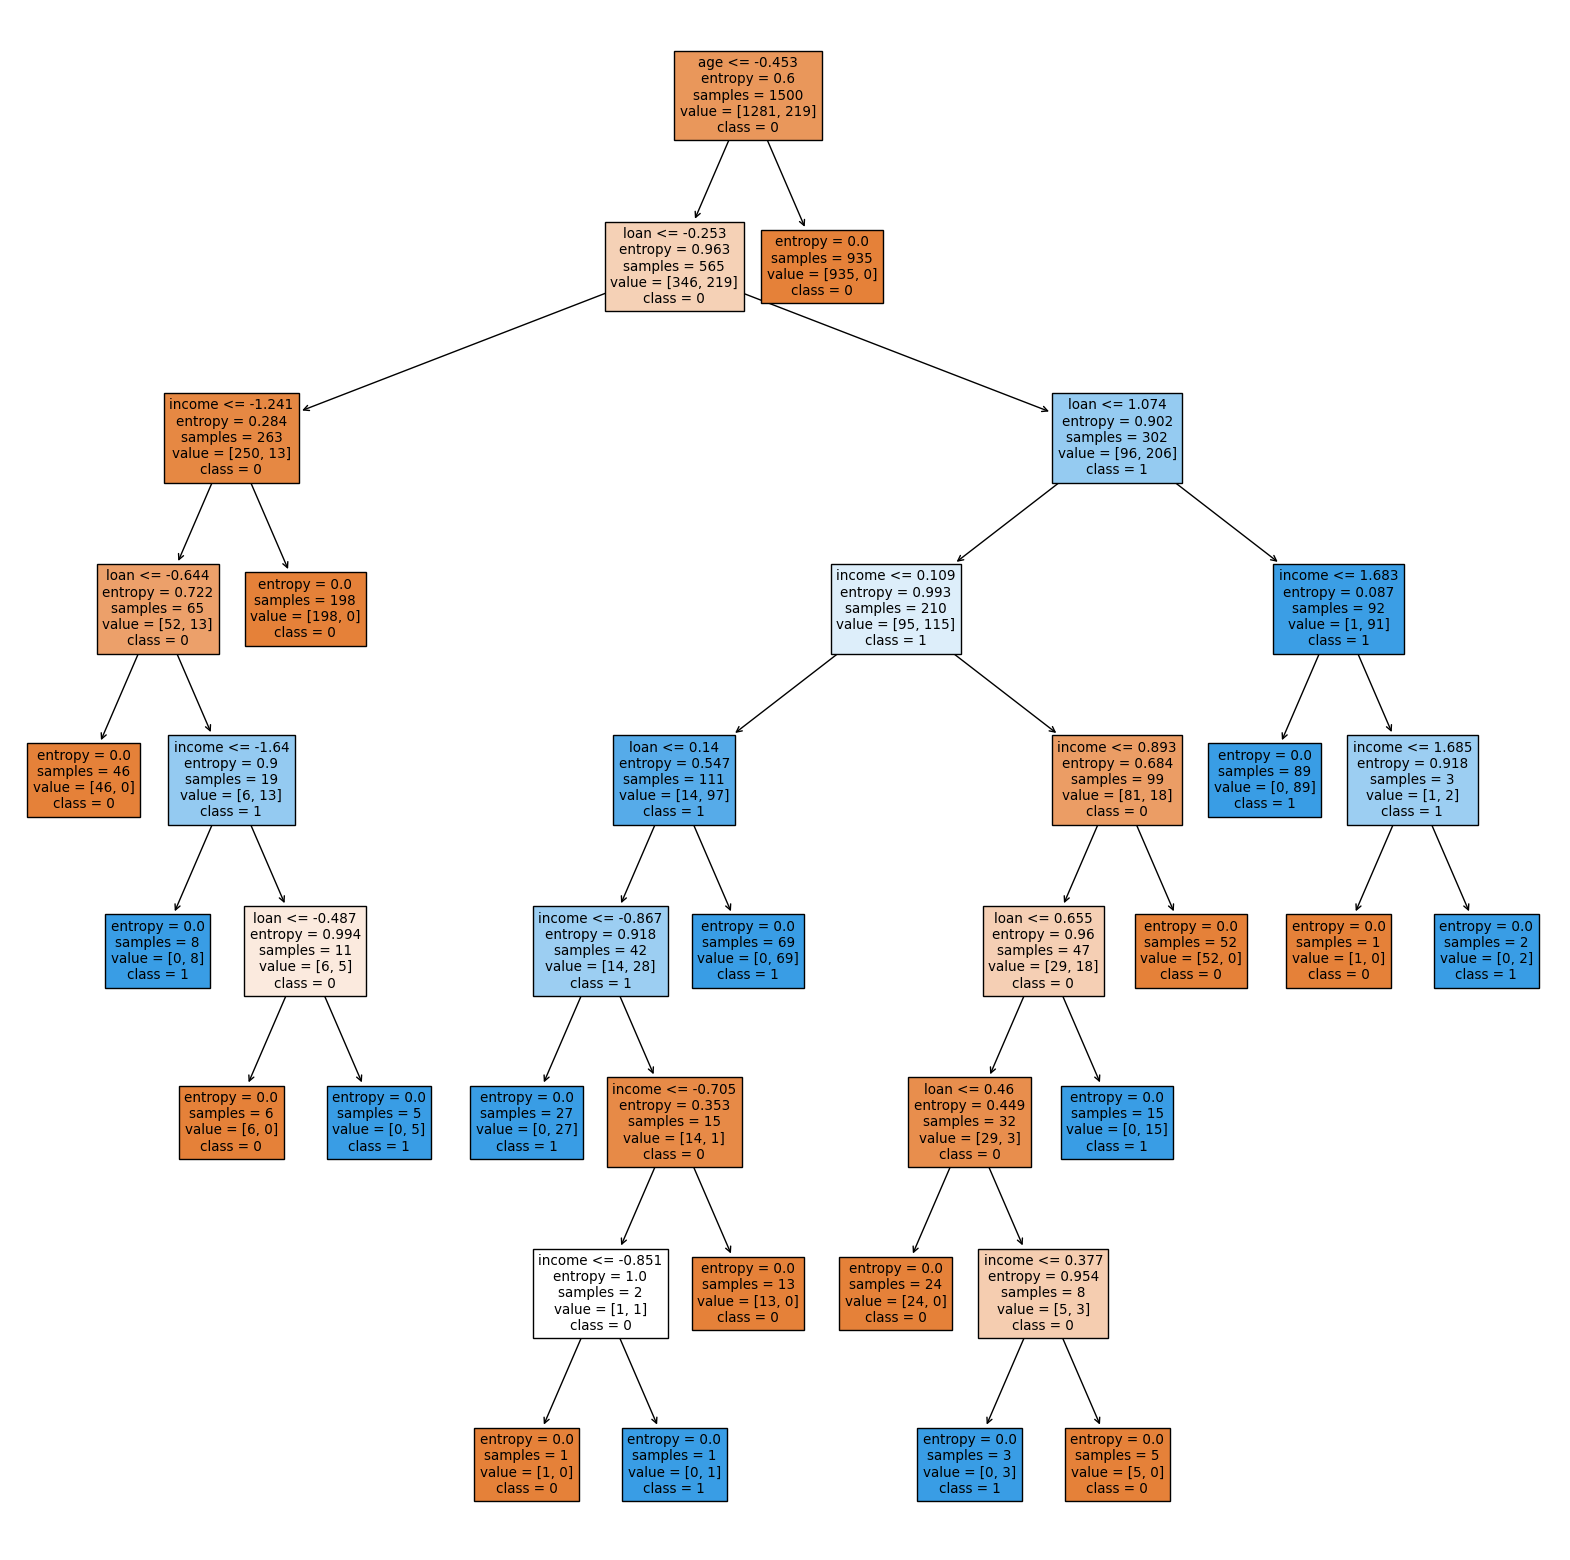

In [80]:
previsores = ['income', 'age', 'loan']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (20,20))
tree.plot_tree(arvore_dados, feature_names=previsores, class_names=['0','1'], filled=True);
fig.savefig('arvore_credit.png')

In [81]:
#Aplicação do Algoritmo Random Forest
#Importação da Biblioteca

print("Dados para o treinamento:")
print(x_dados_treino.shape, y_dados_treino.shape)


print("Dados para o Teste:")
print(x_dados_teste.shape, y_dados.shape)

Dados para o treinamento:
(1500, 3) (1500,)
Dados para o Teste:
(500, 3) (2000,)


In [83]:
random_forest_dados = RandomForestClassifier(n_estimators=40, criterion='entropy', random_state=0)
random_forest_dados.fit(x_dados_treino, y_dados_treino)

RandomForestClassifier(criterion='entropy', n_estimators=40, random_state=0)

In [84]:
previsoes_random = random_forest_dados.predict(x_dados_teste)
previsoes_random

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [85]:
y_dados_teste

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [86]:
accuracy_score(y_dados_teste, previsoes_random)

0.984

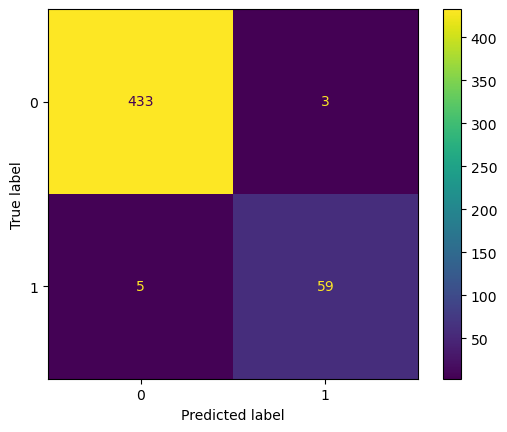

In [87]:
random_matriz_conf = confusion_matrix(y_dados_teste, previsoes_random)
visual = ConfusionMatrixDisplay(confusion_matrix=random_matriz_conf)
visual.plot();

In [88]:
print(classification_report(y_dados_teste, previsoes_random))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       436
           1       0.95      0.92      0.94        64

    accuracy                           0.98       500
   macro avg       0.97      0.96      0.96       500
weighted avg       0.98      0.98      0.98       500



10 ) Resumo dos Algoritmos aplicados

In [95]:
print("Os resultados do algoritmo NAIVE BAIYES FORAM:")
print("ACURÀCIA: ", accuracy_score(y_dados_teste, previsoes_naive))
print("------" * 10)
print(classification_report(y_dados_teste, previsoes_naive))

Os resultados do algoritmo NAIVE BAIYES FORAM:
ACURÀCIA:  0.938
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       436
           1       0.84      0.64      0.73        64

    accuracy                           0.94       500
   macro avg       0.89      0.81      0.85       500
weighted avg       0.93      0.94      0.93       500



In [ ]:
print("Os resultados do algoritmo ÁRVORE DE DECISÃO FORAM:")
print("ACURÀCIA: ", accuracy_score(y_dados_teste, previsoes_arvore))
print("------" * 10)
print(classification_report(y_dados_teste, previsoes_arvore))

Os resultados do algoritmo ÁRVORE DE DECISÃO FORAM:
ACURÀCIA:  0.982
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       436
           1       0.91      0.95      0.93        64

    accuracy                           0.98       500
   macro avg       0.95      0.97      0.96       500
weighted avg       0.98      0.98      0.98       500



In [96]:
print("Os resultados do algoritmo RANDOM FOREST FORAM:")
print("ACURÀCIA: ", accuracy_score(y_dados_teste, previsoes_random))
print("------" * 10)
print(classification_report(y_dados_teste, previsoes_random))

Os resultados do algoritmo RANDOM FOREST FORAM:
ACURÀCIA:  0.984
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       436
           1       0.95      0.92      0.94        64

    accuracy                           0.98       500
   macro avg       0.97      0.96      0.96       500
weighted avg       0.98      0.98      0.98       500

